In [2]:
# sometimes have to run this twice
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 

# crcf demo 
By: J. Marcus Hughes

This notebook is a demo of the crcf package on some test data. It displays some of the basic functionality that should get you up to speed. To understand how the forests work mathematically please see the [overview](https://github.com/jmbhughes/crcf/blob/master/overview.pdf). In short, this package demonstrates a few different related tree based methods of anomaly detection.

# Generate some test data

We define the data as a mixture of Gaussians as below. You can largely disregard this for the test. 

In [3]:
# you can ignore this code block unless you want to change the test data. 

def gaussian_mixture(ps, means, covs, count=100):
    counts = np.random.multinomial(count, ps, size=1)[0] # how many points are from each component
    
    data = [np.random.multivariate_normal(means[i], covs[i], count) for i, count in enumerate(counts)] # generate
    data = np.concatenate(data) # combine the data
    
    # shuffle the data
    new_index = np.arange(data.shape[0])
    np.random.shuffle(np.arange(data.shape[0]))
    data = data[new_index]
    return data

def generate_test(N, anomalous_rate):
    # Calculate how many data points there will be in each category
    typical_count, anomalous_count = np.random.multinomial(N, [1-anomalous_rate, anomalous_rate], size=1)[0]

    # Describe typical data with a 2 component Gaussian mixture
    typical_means = [[8, 8],      # mean of component 1
                    [-8, -8]]     # mean of component 2
    typical_covs = [[[1,0],[0,1]],  # covariance matrix of component 1
                    [[1,0],[0,1]]]  # covariance matrix of compoinent 2
    typical_ps = [0.5,              # probability of component 1
                  0.5]              # probability of component 2
    typical_data = gaussian_mixture(typical_ps, typical_means, typical_covs, count=typical_count)

    # Describe anomalous data with a 2 component Gaussian mixture
    anomalous_means = [[20, -20],            # mean of component 1
                      [0, 0]]                # mean of component 2
    anomalous_covs = [[[0.5, 0], [0, 0.5]],  # covariance of component 1
                      [[10, 0], [0, 10]]]    # covariance of component 2
    anomalous_ps = [0.1,                      # probability of component 1
                  0.9]                       # probability of component 2
    anomalous_data = gaussian_mixture(anomalous_ps, anomalous_means, anomalous_covs, count=anomalous_count)

    # Combine the data but preserve the labeling
    x = np.concatenate([typical_data, anomalous_data])
    y = np.concatenate([np.repeat(0, typical_count), np.repeat(1, anomalous_count)])
    new_index = np.arange(y.shape[0])
    np.random.shuffle(new_index)
    y = y[new_index]
    x = x[new_index]
    return x, y

def plot_anom(x, y):
    """ plots anomalies with red and typical with green"""
    fig, ax = plt.subplots()
    ax.scatter(x[:,0], x[:,1], s=3, 
               c=['red' if yy else 'green' for yy in y])
    fig.show()

Below we generate the data and plot it. Typical data is green and anomalous data is red. 

<IPython.core.display.Javascript object>


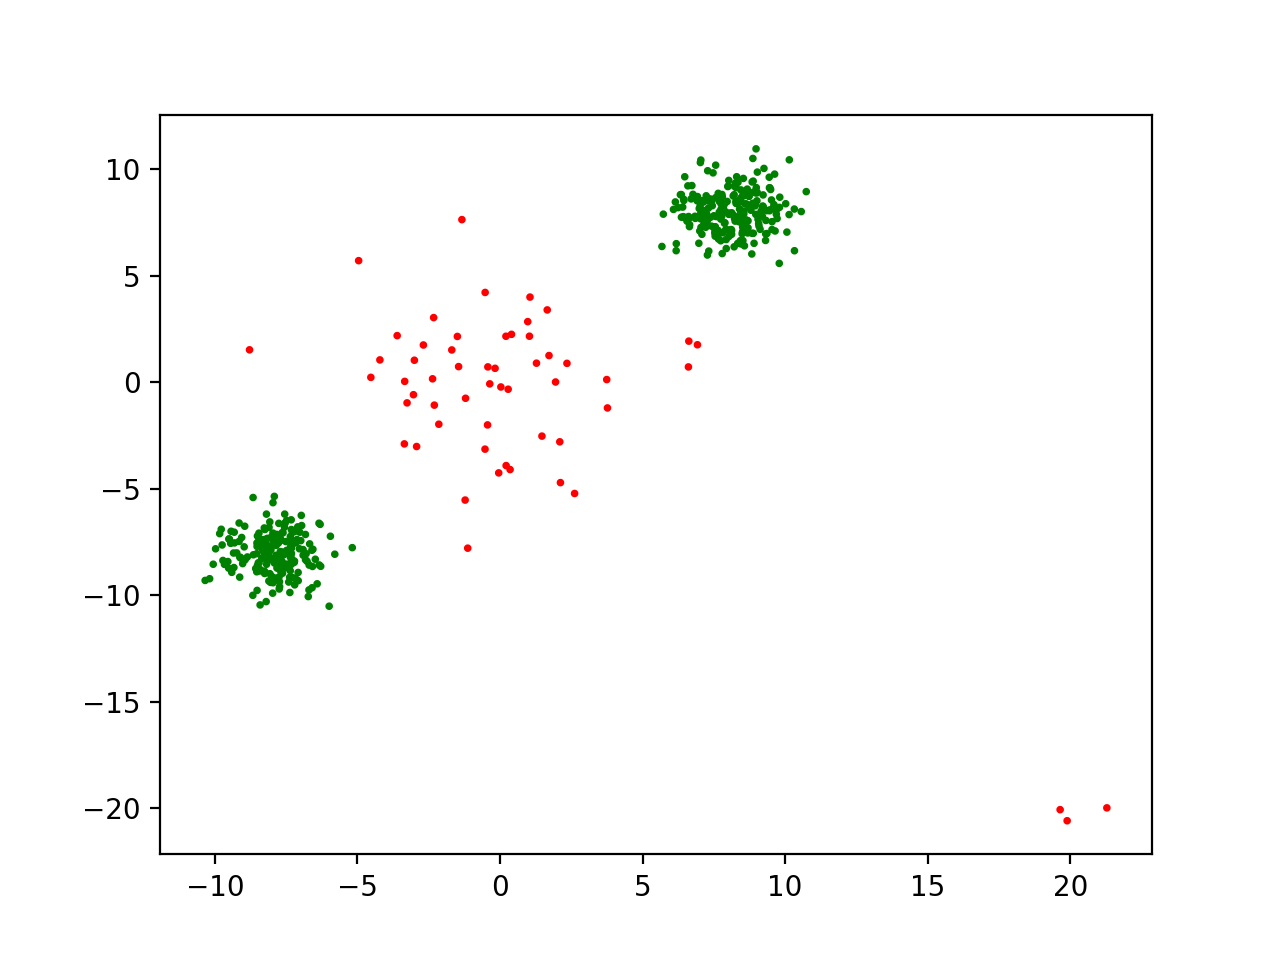

In [4]:
N = 500  # number of data points to generate
anomalous_rate = 0.1  # the rate at which anomalous points occur
x, y = generate_test(N, anomalous_rate)
plot_anom(x, y)

# Basics

In [5]:
from crcf import CombinationForest

In [6]:
forest = CombinationForest()
forest.fit(x)

In [8]:
forest.depth(np.array([5, 5, 5]))

8.25

# Individual tree operations
You can train an individual tree too, but you will likely not need to for most operations. Thus, you can likely ignore this section unless you want to examine the properties of individual trees. 

In [5]:
from crcf.tree import CombinationTree

We can fit the tree and then do the easy thing of showing it. 

In [9]:
tree = CombinationTree(depth_limit=None)
tree.fit(x)
tree.show()

Obviously, that's a bit intractable to look at. So, let's limit the depth!

In [21]:
tree = CombinationTree(depth_limit=5)
tree.fit(x)
tree.show()

Just like with the forests, you can get scores from a single tree. However, they're much less reliable. 

<IPython.core.display.Javascript object>


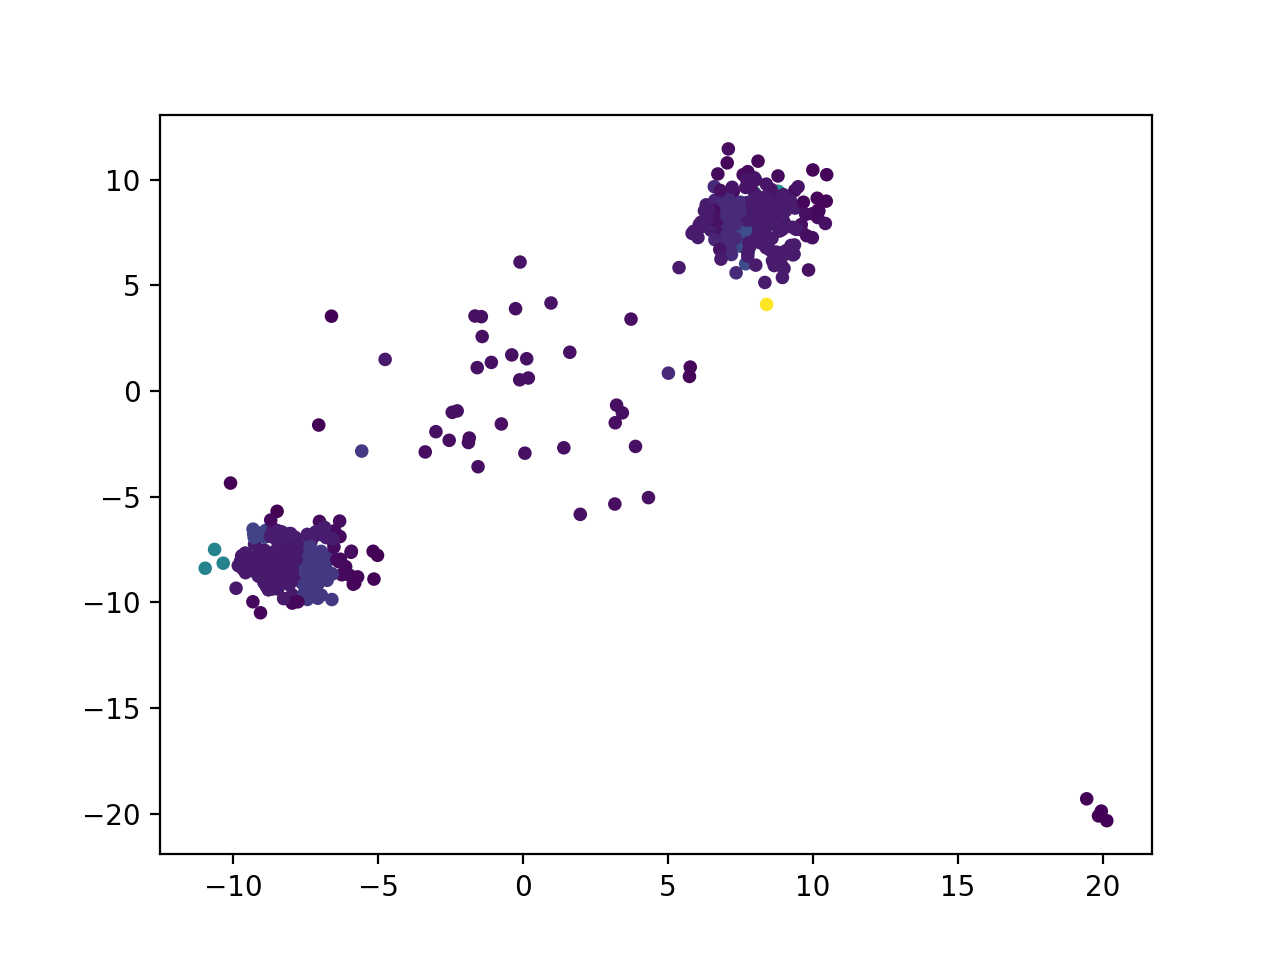

In [58]:
tree = CombinationTree(depth_limit=10)
tree.fit(x)
scores = tree.score(x, estimated=True, alpha=0.5, beta=0.5)
fig, ax = plt.subplots()
ax.scatter(x[:,0], x[:,1], s=15, c=scores)
fig.show()

Just like with the forests, there are implemented defaults, e.g. Isolation forests, we get the same defaults here. 